In [1]:
from coptpy import *
import numpy as np
import matplotlib.pyplot as plt
import igraph
import networkx as nx
import matplotlib.pyplot as plt
import math
from networkx.drawing.nx_pydot import graphviz_layout


In [2]:
rndEdge = np.random
rndEdge.seed(13)
a = rndEdge.randint(1,21)
b = rndEdge.randint(1,21)
print(a,b)

19 17


In [3]:
rnd = np.random
rnd.seed(0)

In [4]:
env = Envr()
model = env.createModel()

Cardinal Optimizer v6.0.5. Build date Feb  7 2023
Copyright Cardinal Operations 2022. All Rights Reserved



In [5]:
def create_random_tree(num_nodes, min_children=1, max_children=7, seed=0):
    rnd = np.random.RandomState(seed)
    tree = nx.Graph()
    tree.add_node(0)

    current_node = 0
    node_counter = 1

    nodes_to_expand = [0]

    while nodes_to_expand and node_counter < num_nodes:
        node = nodes_to_expand.pop(0)
        num_children = rnd.randint(min_children, max_children + 1)
        
        for _ in range(num_children):
            if node_counter >= num_nodes:
                break

            tree.add_edge(node, node_counter)
            nodes_to_expand.append(node_counter)
            node_counter += 1

    return tree

In [6]:
def add_edge(G,x,y,weight):
    G.add_edge(x,y)
    G.edges[x,y]["weight"] = weight

In [7]:
n = 20 #Count of nodes

#xc yc
xc = rnd.rand(n+1)*200
yc = rnd.rand(n+1)*100

#Initialize 
graph = create_random_tree(n+1,seed = 12)

for i,j in graph.edges():
    graph.edges[i,j]["weight"] =  math.ceil(np.hypot(xc[i] - xc[j],yc[i] - yc[j]))

graph.add_node(n+1)
for neighbor in graph.neighbors(0):
    graph.add_edge(n+1,neighbor)

for i,j in graph.edges(0):
    graph.edges[j,n+1]["weight"] = graph.edges[i,j]["weight"]
    
graph.add_edge(n+1,0) 
graph.edges[0,21]["weight"] = 0


min_w = 10000
for u,v, weight  in graph.edges.data('weight'):
    if weight != 0 and min_w > weight :
        min_w = weight
min_w



11

In [8]:
#Update_edges



In [9]:

Q = 110
C = [i for i in range(1,n+1)]
N = [i for i in range(0,n+2)]
#Demands
q = {i: rnd.randint(20,81) for i in C}#Demand at node i

q[0] = 0
q[n+1] = 0

#distance
c = dict(nx.shortest_path_length(graph, weight='weight'))


#Vehicle
sum_dem = 0

for i in q:
    sum_dem +=q[i]
K = math.ceil(sum_dem/Q)+ 2
print(K)

12


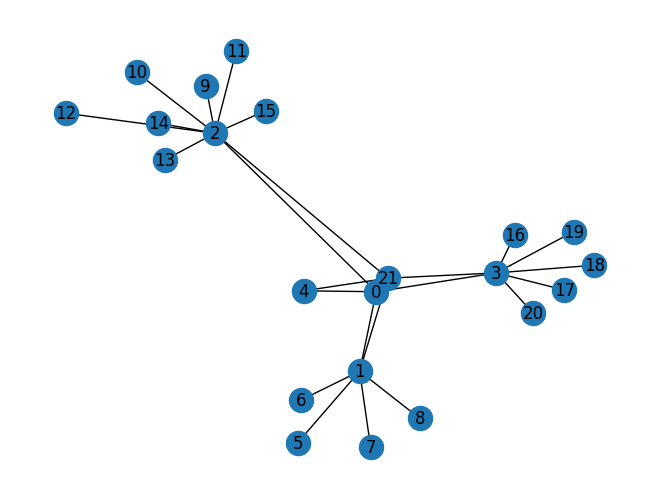

In [10]:
nx.draw(graph,with_labels=True)
plt.show()

In [11]:
x = model.addVars(N,N,vtype = COPT.BINARY)
y = model.addVars(N,vtype = COPT.CONTINUOUS)

In [12]:
model.setObjective(quicksum(quicksum(x[i,j]*c[i][j] for j in range(0,n+2)) for i in range(0,n+2)),COPT.MINIMIZE) 

In [13]:
#2.2
for i in C:
    model.addConstr(quicksum(x[i,j] for j in range(1,n+2) if i != j) == 1) 
#2.3 
for h in C:
    model.addConstr((quicksum(x[i,h] for i in range(0,n+1) if i != h) - quicksum(x[h,j] for j in range(1,n+2) if j != h)) == 0)
#2.4   
model.addConstr(quicksum(x[0,j] for j in C) <= K)
#2.5
for i in N:
    for j in N:
        model.addConstr(y[j] >= y[i] + q[j]*x[i,j] - Q*(1 - x[i,j]))
#2.6
for i in N:
    model.addConstr(q[i] <= y[i] <= Q)

In [14]:
model.setParam(COPT.Param.TimeLimit, 600)

Setting parameter 'TimeLimit' to 600


In [15]:
model.solve()

Model fingerprint: e4b1ab6

Using Cardinal Optimizer v6.0.5 on Windows
Hardware has 6 cores and 12 threads. Using instruction set X86_NATIVE (1)
Minimizing a MIP problem

The original problem has:
    547 rows, 506 columns and 2650 non-zero elements
    484 binaries

Presolving the problem

The presolved problem has:
    303 rows, 282 columns and 1290 non-zero elements
    262 binaries

Starting the MIP solver with 12 threads and 32 tasks

     Nodes    Active  LPit/n  IntInf     BestBound  BestSolution    Gap   Time
         0         1      --       0  1.407000e+03            --    Inf  0.03s
H        0         1      --       0  1.407000e+03  3.458000e+03  59.3%  0.09s
         0         1      --      41  2.412000e+03  3.458000e+03  30.2%  0.12s
         0         1      --      39  2.412000e+03  3.458000e+03  30.2%  0.14s
         0         1      --      40  2.412000e+03  3.458000e+03  30.2%  0.14s
         0         1      --      39  2.412000e+03  3.458000e+03  30.2%  0.15s
   

In [16]:
def swap_search(var_x,i):
    if i != n+1:
        for j in range (1,n+2):
            if x[i,j].x > 0.99999:
                if j == n+1:
                    print("%d -> %d " %(i,0),end = '')
                else:
                    print("%d -> %d " %(i,j),end = '')
                return swap_search(var_x,j)
            
def swap_search_print(var_x):
    v = 0
    for i in range(1,n+1):
        if x[0,i].x > 0.9999:
            v =v + 1
            if v != 1:
                print("\n Vehicle %d" %(v))
            else:
                print("Vehicle %d" %(v))
            print("0 -> %d"%(i),end = ' ')
            swap_search(var_x,i)

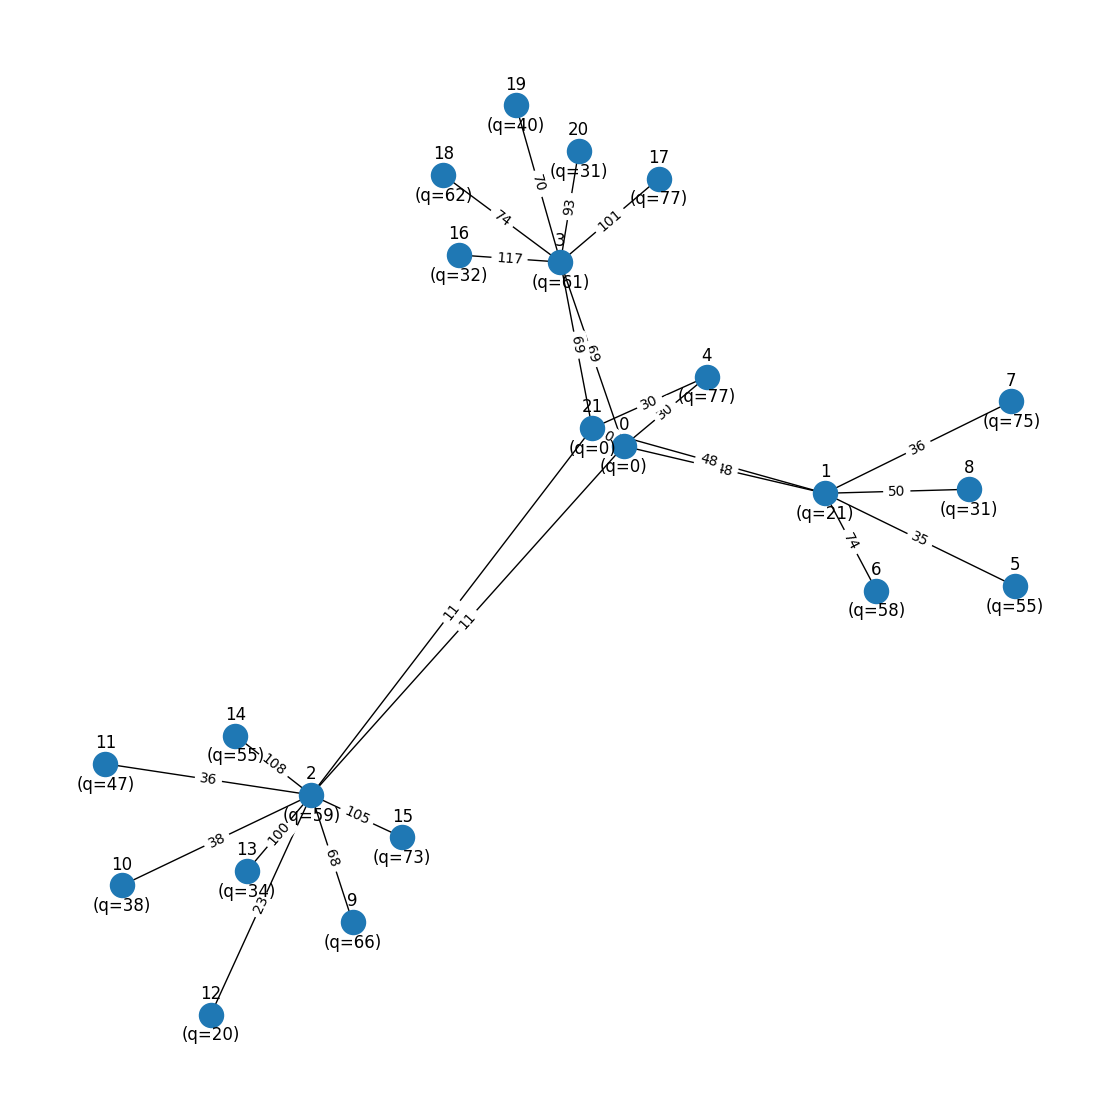

In [17]:
plt.figure(figsize=(11, 11))
pos = nx.spring_layout(graph)
nx.draw(graph, pos)
labels = nx.get_edge_attributes(graph, 'weight')
nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels)

# Добавление меток вершин
node_labels = {node: f"{node}\n\n(q={q[node]})" for node in graph.nodes()}
nx.draw_networkx_labels(graph, pos, labels=node_labels)

plt.show()

In [18]:
swap_search_print(x)

Vehicle 1
0 -> 1 1 -> 6 6 -> 0 
 Vehicle 2
0 -> 2 2 -> 13 13 -> 0 
 Vehicle 3
0 -> 4 4 -> 0 
 Vehicle 4
0 -> 5 5 -> 8 8 -> 0 
 Vehicle 5
0 -> 7 7 -> 0 
 Vehicle 6
0 -> 9 9 -> 10 10 -> 0 
 Vehicle 7
0 -> 12 12 -> 15 15 -> 0 
 Vehicle 8
0 -> 14 14 -> 11 11 -> 0 
 Vehicle 9
0 -> 16 16 -> 3 3 -> 0 
 Vehicle 10
0 -> 18 18 -> 19 19 -> 0 
 Vehicle 11
0 -> 20 20 -> 17 17 -> 0 

In [19]:
print(c[3][11])
print(c[0][10])

116
49


In [20]:
#def loss_func(graph,Q,z,i,j):
#    if min(graph.edges[z,i]["weight"],graph.edges[z,j]["weight"]) + graph.edges[i,j]["weight"] < max (graph.edges[z,i]["weight"],graph.edges[z,j]["weight"]):
#        if q[i] + q[j] <= Q:
#            return 2*(( graph.edges[z,i]["weight"] + graph.edges[z,j]["weight"]) - (graph.edges[i,j]["weight"] + min(graph.edges[z,i]["weight"],graph.edges[z,j]["weight"])))
#        elif q[i] + q[j] >Q:
#            print("k = 4")
#            k = 4
#            return 2*( graph.edges[z,i]["weight"] + graph.edges[z,j]["weight"]) - 2*graph.edges[i,j]["weight"] - k*min(graph.edges[z,i]["weight"],graph.edges[z,j]["weight"])
#    else:
#        return 0

In [21]:
#loss_func(graph,Q,2,10,8)

In [22]:
#z = 2 
#i = 10
#j = 8
#k = 4
#2*( graph.edges[z,i]["weight"] + graph.edges[z,j]["weight"]) - 2*graph.edges[i,j]["weight"] - k*min(graph.edges[z,i]["weight"],graph.edges[z,j]["weight"])

In [23]:
def loss_func(graph,n,q,Q,z,i,j):
    
    def min_subsets_recursive(weights, W, index=0, current_subsets=None):
        if current_subsets is None:
            current_subsets = []

        if index == len(weights):
            return len(current_subsets)

        min_subsets_count = float("inf")
        for i, subset in enumerate(current_subsets):
            if sum(subset) + weights[index] <= W:
                current_subsets[i].append(weights[index])
                min_subsets_count = min(min_subsets_count, min_subsets_recursive(weights, W, index + 1, current_subsets))
                current_subsets[i].pop()

        new_subset = [weights[index]]
        current_subsets.append(new_subset)
        min_subsets_count = min(min_subsets_count, min_subsets_recursive(weights, W, index + 1, current_subsets))
        current_subsets.pop()

        return min_subsets_count
    
    
    #if min(graph.edges[z,i]["weight"],graph.edges[z,j]["weight"]) + graph.edges[i,j]["weight"] < max (graph.edges[z,i]["weight"],graph.edges[z,j]["weight"]):
    if q[i] + q[j] <= Q:
            #Initialize matrix of weights
            prevArr = list(graph.neighbors(z)) + [z]
            print(prevArr)
            prevArr.remove(0)
            prevArr.remove(n+1)
            prevWeiArr = [q[x] for x in prevArr]
            #New matrix with qi+qj weight
            
            newWeiArr = prevWeiArr[:]
            newWeiArr.remove(q[i])
            newWeiArr.remove(q[j])
            newWeiArr.append(q[i]+q[j])
   
            #Count of subsets
            prevSet = min_subsets_recursive(prevWeiArr,Q)
            newSet = min_subsets_recursive(newWeiArr,Q)
            if   newSet - prevSet  > 0:
                if graph.edges[0,z]["weight"] > min(graph.edges[z,i]["weight"],graph.edges[z,j]["weight"]):
                    print("Here")
                    k = 4
                    return 2*( graph.edges[z,i]["weight"] + graph.edges[z,j]["weight"]) - 2*graph.edges[i,j]["weight"] - k*min(graph.edges[z,i]["weight"],graph.edges[z,j]["weight"]) 
                else:
                    print("Here two")
                    return 2*(( graph.edges[z,i]["weight"] + graph.edges[z,j]["weight"]) - (graph.edges[i,j]["weight"] + min(graph.edges[z,i]["weight"],graph.edges[z,j]["weight"])))+ 2*graph.edges[0,z]["weight"]
            else:
                return 2*(( graph.edges[z,i]["weight"] + graph.edges[z,j]["weight"]) - (graph.edges[i,j]["weight"] + min(graph.edges[z,i]["weight"],graph.edges[z,j]["weight"])))
    elif q[i] + q[j] >Q:
        if min(graph.edges[z,i]["weight"],graph.edges[z,j]["weight"]) + graph.edges[i,j]["weight"] < max (graph.edges[z,i]["weight"],graph.edges[z,j]["weight"]):
            print("k = 4")
            k = 4
            return 2*( graph.edges[z,i]["weight"] + graph.edges[z,j]["weight"]) - 2*graph.edges[i,j]["weight"] - k*min(graph.edges[z,i]["weight"],graph.edges[z,j]["weight"])
        else : 
            return 0


In [24]:
print(loss_func(graph,n,q,Q,4,19,14))

[0, 21, 4]


ValueError: list.remove(x): x not in list